# Get Yahoo authentication

In [1]:
from lib.get_data.league.yahoo_fantasy import YahooFantasy
import yaml

config_file = 'myconfig.yml'

with open(config_file, "r") as f:
    config = yaml.safe_load(f)
    
league = YahooFantasy(config['YAHOO']['CLIENT_ID'], config['YAHOO']['CLIENT_SECRET'], config['YAHOO']['LEAGUE_ID'])

league.get_auth_code()

# Get fantasy team rosters

In [2]:
# Enter authorization code here:
code = '4uyk79k'
my_team = 'Green Eggs and Jam'
opp_team = 'Jerichos Unreal Team'
season_start = '2021-10-19'
sim_start = '2021-12-13'
sim_end = '2021-12-20'
num_runs = 1000
bootstrap = False

# Get team rosters
league.authorize(code)
my_roster = league.get_team_roster(my_team, exclude_unavailable=True)
opp_roster = league.get_team_roster(opp_team, exclude_unavailable=True)
print(my_roster)
print('')
print(opp_roster)

[Player(first_name=Pat, last_name=Connaughton, team=MIL, status=None, id=None), Player(first_name=Tyrese, last_name=Maxey, team=PHI, status=None, id=None), Player(first_name=Josh, last_name=Hart, team=NOP, status=None, id=None), Player(first_name=Jimmy, last_name=Butler, team=MIA, status=None, id=None), Player(first_name=Lonnie, last_name=Walker IV, team=SAS, status=None, id=None), Player(first_name=Jonas, last_name=Valanciunas, team=NOP, status=None, id=None), Player(first_name=Karl-Anthony, last_name=Towns, team=MIN, status=None, id=None), Player(first_name=Luguentz, last_name=Dort, team=OKC, status=None, id=None), Player(first_name=De'Aaron, last_name=Fox, team=SAC, status=None, id=None), Player(first_name=Al, last_name=Horford, team=BOS, status=None, id=None), Player(first_name=Gordon, last_name=Hayward, team=CHA, status=None, id=None), Player(first_name=Harrison, last_name=Barnes, team=SAC, status=None, id=None), Player(first_name=Alex, last_name=Caruso, team=CHI, status=None, id=

# Run the Monte Carlo simulations
Synthetic stat lines can be generated by either through a guassian generator (default) or bootstrap sampling.

### Guassian
The gaussian will give stats in a continuous distribution assuming normality. This can give a very smooth result if we make the following assumptions:
1. Normality for the distribution of each of the stat categories (e.g. due to a large number of independent factors that goes into every shot for instance)
2. That each stat category is independent (e.g. that the number of points scored has no effect on the number of rebounds for instance)

### Bootstrap
Bootstrap sampling doesn't require us to make any assumptions other than the actual distribution == sample distribution. However the results can be very uneven if being used with an insufficiently large sample size.

In [3]:
from lib.mcbball import MCBBall

stat_list = ['fga', 'fgm', 'fta', 'ftm', 'fg3m', 'pts', 'reb', 'ast', 'stl', 'blk', 'turnover']

mcb = MCBBall()

my_weeks = mcb.generate_stat_totals(my_roster, sim_start, sim_end, stat_list, season_start, num_runs, bootstrap)
display(my_weeks.head())

,fga,fgm,fta,ftm,fg3m,pts,reb,ast,stl,blk,turnover,games
0,651.712520,288.845042,177.300588,160.441113,83.381445,754.060319,320.078374,153.206063,67.748911,31.518724,92.444384,52.0
1,625.689087,325.499864,202.730070,182.079658,90.886493,840.773436,278.205895,175.593635,50.825302,36.414647,104.279569,52.0
2,649.615737,298.191219,224.655548,181.244319,85.377286,785.407594,278.779109,202.976239,66.402598,21.136207,101.204669,52.0
3,624.229192,292.299713,203.480788,165.705209,75.268076,806.421665,306.369719,185.515903,64.149639,31.788563,99.259197,52.0
4,682.674795,284.116136,213.676568,178.831734,75.027116,851.250596,307.268671,188.028964,54.389743,27.768728,122.812398,52.0


In [4]:
# Be kind to the BDL API (it's free!); if you hit it with too many requests quickly it will stop returning data

opp_weeks = mcb.generate_stat_totals(opp_roster, sim_start, sim_end, stat_list, season_start, num_runs, bootstrap)
display(opp_weeks.head())

,fga,fgm,fta,ftm,fg3m,pts,reb,ast,stl,blk,turnover,games
0,435.280861,207.501004,112.503176,69.143957,56.572841,575.881129,244.790765,122.212421,29.212878,21.587775,49.534337,37.0
1,434.302509,196.808788,98.500927,70.908158,42.088754,477.166894,234.344576,125.768977,25.912195,28.714744,75.366656,37.0
2,406.024261,213.380595,100.622891,93.840091,62.047681,540.339725,249.375001,123.845879,25.776838,25.829214,65.695983,37.0
3,423.856980,178.312797,93.033903,74.509068,47.617130,532.919617,228.908792,117.951031,28.690327,26.450509,60.697432,37.0
4,419.358820,217.281119,109.699571,81.616336,27.334717,553.818658,233.674045,127.119466,31.761819,25.513420,68.126211,37.0


In [5]:
# Calculate Field goal percentage and free thow percentage

my_weeks['fgp'] = my_weeks['fgm']/my_weeks['fga']
my_weeks['ftp'] = my_weeks['ftm']/my_weeks['fta']
opp_weeks['fgp'] = opp_weeks['fgm']/opp_weeks['fga']
opp_weeks['ftp'] = opp_weeks['ftm']/opp_weeks['fta']

## Plot results

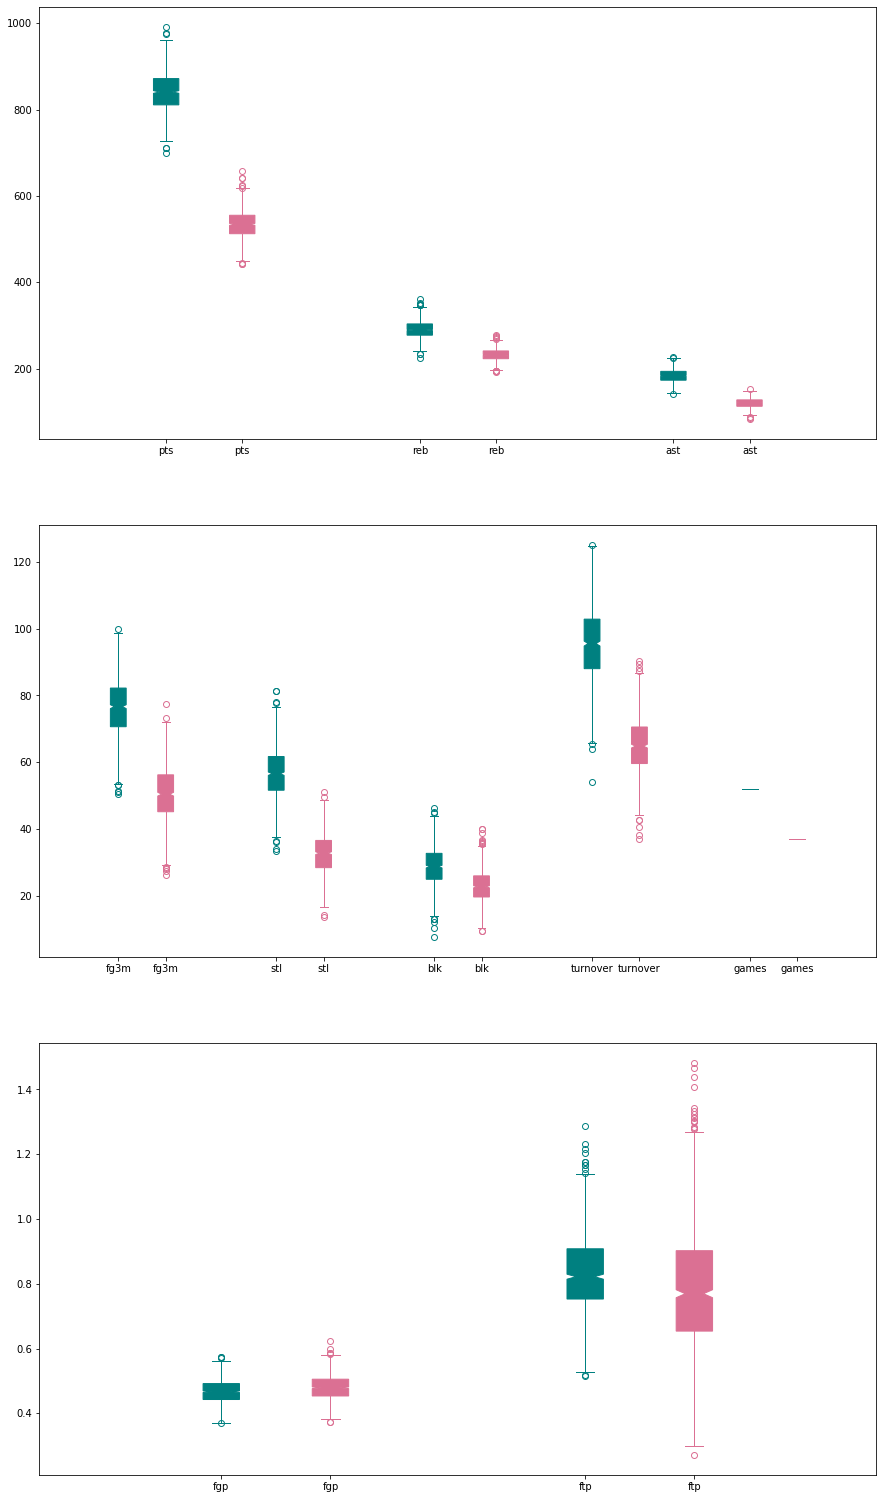

In [6]:
import matplotlib.pyplot as plt

# Break the results into groups because of difference in y-axis
groups = [['pts', 'reb', 'ast'], 
          ['fg3m', 'stl', 'blk', 'turnover', 'games'], 
          ['fgp', 'ftp']]
my_color = 'teal'
opp_color = 'palevioletred'


# Plot stats------------------------------------------------------------------
fig = plt.figure(figsize=(15,27))
width = 0.1
n = len(groups)
    
for i in range(n):
    m = len(groups[i])
    widths = [width] * m
    opp_positions = [x + width + 1.2 for x in range(m)]
    
    plt.subplot(n, 1, i + 1)

    # Plot distribution of my stats
    plt.boxplot(my_weeks[groups[i]], labels=groups[i],
                # This is all aesthetic formatting
                widths=widths,
                notch=True, patch_artist=True, 
                boxprops=dict(facecolor=my_color, color=my_color),
                capprops=dict(color=my_color),
                whiskerprops=dict(color=my_color),
                flierprops=dict(color=my_color, markeredgecolor=my_color),
                medianprops=dict(color=my_color))

    # Plot distribution of opponent stats
    plt.boxplot(opp_weeks[groups[i]], labels=groups[i],
                # Aesthetic formatting
                positions=opp_positions, widths=widths,
                notch=True, patch_artist=True, 
                boxprops=dict(facecolor=opp_color, color=opp_color),
                capprops=dict(color=opp_color),
                whiskerprops=dict(color=opp_color),
                flierprops=dict(color=opp_color, markeredgecolor=opp_color),
                medianprops=dict(color=opp_color))

plt.show()